In [2]:
#For Google Colab
from google.colab import drive
drive.mount('/content/drive')
!cp -r '/content/drive/MyDrive/Final Dataset/' '/content/FinalDataset'
!pip install autopep8


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.1 MB/s 
     |████████████████████████████████| 41 kB 310 kB/s 


In [ ]:
"""Startup"""
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import re
import numpy as np
import pickle
from IPython.display import clear_output
import time
import sys

slashForDir = "/"
def convSlashes(path):
    return path.replace("/", slashForDir).replace("\\", slashForDir)

globalDataSet = pd.DataFrame(columns=['data', 'grade'])


pathToDataCollectorDatabase = convSlashes('/content/FinalDataset')

print (pathToDataCollectorDatabase)

ranSimilarization = False


# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
        
def searchFiles(path, fileformats):
    filesToDo = []
    for root, dirs, files in os.walk(path):
        for file in files:
            for fileformat in fileformats:
                if file.endswith(fileformat):
                    #code to generate a list of paths of files to generate logs for
                    filesToDo.append(os.path.join(root, file).split(path)[1])
    return filesToDo

def searchFileName(path, fileName):
    filesToDo = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file == fileName:
                #code to generate a list of paths of files to generate logs for
                filesToDo.append(os.path.join(root, file).split(path)[1])
    return filesToDo


#CODE SIMILARIZER
#EDGE CASES NOT ACCOUNTED FOR: Dictinary definitions


  

# Add this import to use isinstance to check if a value is a string or number
from numbers import Number
import autopep8

# Add this import to use ast.Str and ast.Num to create new string and number nodes
import ast


# ...

skipErrorCorrection = True


lengthLimitmb = .05
lengthLimitBytes = lengthLimitmb * 1000000
enableLengthLimit = True
autopep8FixTimeLimit = 10 #seconds

def change_names(code):
  #get the size of the code in memory
  size = sys.getsizeof(code)

  if (skipErrorCorrection == True or (enableLengthLimit and size > lengthLimitBytes)):
    tree = ast.parse(code)
  else:
    try:
      tree = ast.parse(code)
    except:
      #start on new thread to be able to time out
      code = autopep8.fix_code(code, options={"max_line_length": 500, "aggressive": 2})
      tree = ast.parse(code)
    

  names = {}

  var_count = 1
  class_count = 1
  funct_count = 1
  
  count_Limit = 100
  #If count_Limit is reached we will loop back to 1  

  for node in ast.walk(tree):
    if isinstance(node, ast.Assign):
      for target in node.targets:
        if isinstance(target, ast.Name):
          if target.id not in names:
            new_name = f"var {var_count}"
            names[target.id] = new_name
            var_count += 1
            if (var_count > count_Limit):
              var_count = 1
          target.id = names[target.id]
    elif isinstance(node, ast.Name):
      if node.id in names:
        node.id = names[node.id]
    elif isinstance(node, ast.ClassDef):
      if node.name not in names:
        new_name = f"class {class_count}"
        names[node.name] = new_name
        class_count += 1
        if (class_count > count_Limit):
          class_count = 1
      node.name = names[node.name]
    elif isinstance(node, ast.FunctionDef):
      if node.name not in names:
        new_name = f"funct {funct_count}"
        names[node.name] = new_name
        funct_count += 1
        if (funct_count > count_Limit):
          funct_count = 1
      node.name = names[node.name]
    # Add this block to rename calls to the class methods
    elif isinstance(node, ast.Call):
      if isinstance(node.func, ast.Attribute) and isinstance(node.func.value, ast.Name) and node.func.value.id in names:
        node.func.value.id = names[node.func.value.id]
        #node.func.attr = names[node.func.attr]
      # Add this block to rename calls to functions defined inside the class
      elif isinstance(node.func, ast.Name) and node.func.id in names:
        node.func.id = names[node.func.id]
    # Add this block to rename attributes in method calls
    if isinstance(node, ast.Attribute) and node.attr in names:
      node.attr = names[node.attr]
    # Add this block to replace string literals
    elif isinstance(node, ast.Str):
      node.s = "strLit"
    # Add this block to replace number literals
    elif isinstance(node, ast.Num):
      node.n = "numLit"

  new_code = ast.unparse(tree)
  
  #make all """strLit""" into "strLit"
  new_code = new_code.replace('"""strLit"""', '"strLit"')
  #make all '''strLit''' into 'strLit'
  new_code = new_code.replace("'''strLit'''", "'strLit'")
  #make all 'strLit' into "strLit"
  new_code = new_code.replace("'strLit'", '"strLit"')
  
  

  return new_code

D:\PythonTestLarge\


In [ ]:
#Generate a list of files to index
#filesToIndex = searchFileName(pathToDataCollectorDatabase,"gitinfo.txt")
#Instead of searching for files, get a 1 level list of directories
filesToIndex = [name for name in os.listdir(pathToDataCollectorDatabase) if os.path.isdir(os.path.join(pathToDataCollectorDatabase, name))]
#Create a dataframe that contains the data of the gitinfo.txt files
import json
import warnings
warnings.filterwarnings('ignore')
i=0
#example of the gitinfo.txt file    {"id": 3452233, "name": "hjlebbink/asm-dude", "isFork": false, "commits": 939, "branches": 8, "defaultBranch": "master", "releases": 39, "contributors": 10, "license": "MIT License", "watchers": 762, "stargazers": 3906, "forks": 76, "size": 82262, "createdAt": "2016-02-19 03:43:23", "pushedAt": "2022-01-06 01:33:34", "updatedAt": "2022-01-08 08:02:49", "homepage": "", "mainLanguage": "Python", "totalIssues": 118, "openIssues": 32, "totalPullRequests": 13, "openPullRequests": 1, "lastCommit": "2021-12-07 08:47:07", "lastCommitSHA": "1e1e3dc2364e8ed549ba404868b6473ba435b25c", "hasWiki": true, "isArchived": false, "languages": {"Python": 4274689, "C#": 2554588, "C": 1311140, "C++": 644077, "Assembly": 164163, "Shell": 2764, "Go": 1779, "Batchfile": 410}, "labels": ["bug", "duplicate", "enhancement", "help wanted", "invalid", "question", "wontfix"]}
df = pd.DataFrame(columns=['id', 'name', 'isFork', 'commits', 'branches', 'defaultBranch', 'releases', 'contributors', 'license', 'watchers', 'stargazers', 'forks', 'size', 'createdAt', 'pushedAt', 'updatedAt', 'homepage', 'mainLanguage', 'totalIssues', 'openIssues', 'totalPullRequests', 'openPullRequests', 'lastCommit', 'lastCommitSHA', 'hasWiki', 'isArchived', 'languages', 'labels' , 'path'])
for folder in filesToIndex:
    #print progress bar
    printProgressBar(i, len(filesToIndex), prefix = 'Progress:', suffix = 'Complete', length = 50)
    try:
        with open(pathToDataCollectorDatabase + slashForDir + folder + slashForDir + "gitinfo.txt", 'r') as f:
            d = json.load(f)
            f.close()
            dftemp = pd.json_normalize(d)
            dftemp['path'] = folder
            df = pd.concat([df, dftemp], ignore_index=True)
    except:
        print("Error with folder: " + folder)
    i = i+1


In [ ]:
#save the index dataframe
df.to_csv(pathToDataCollectorDatabase + 'gitinfo.csv', index=False)

In [ ]:
#load the index dataframe
import json
import warnings
df = pd.read_csv(pathToDataCollectorDatabase + slashForDir + 'gitinfo.csv')

In [ ]:
print (df)

In [ ]:
#Grading V2
#Only works with \\ as slash for some reason, Fix later.
import numpy as np
import requests

fileformatToUse = ".txt"
useGITAPI = False
addRepoToData = True
onlyAddIfSimilized = True


ranSimilarization = onlyAddIfSimilized


#commit comment keywords for code grade adjustment
positiveKeyWords = ['fix', 'resolve', 'resolve', 'resolved', 'resolves', 'resolving', 'close', 'closed', 'closes', 'closing', 'fixes', 'fixed', 'fixing', 'patch', 'patched', 'patching', 'update', 'updated', 'updating', 'upgrade', 'upgraded', 'upgrading', 'improve', 'improved', 'improving', 'improvement', 'improvements', 'improves', 'improving', 'enhance', 'enhanced', 'enhances', 'enhancing', 'enhancement', 'enhancements']
positiveKeyWordsBigImpact = ['Signed-off', 'Merge', 'Merged']
positiveKeyWordsValue = 1
positiveKeyWordsBigImpactValue = 5
negitiveKeyWords = ['todo','tofix','bugged','fix me','fix-me']
negitiveKeyWordsValue = -1

prevCommitScoreAdjustmentNegitiveKeyWords = ['revert','reverted','reverting','reverts']
prevCommitScoreAdjustmentNegitiveKeyWordsValue = -10



import numpy as np
filesToIndex = df['path'].tolist()
#Create an array of strings of folders which contain a 0.txt file. Kinda slow using searchFileName, but only takes about 10 mins with 2000 repos
foldersWithCommits = []
for file in filesToIndex:
    for filelvl2 in searchFileName(pathToDataCollectorDatabase+file, "0.txt"):
        #print(pathToDataCollectorDatabase+file+filelvl2.removesuffix('0.txt'))
        if (searchFiles(pathToDataCollectorDatabase+file+filelvl2.split('0.txt')[0], fileformatToUse) != []):
            foldersWithCommits.append(file+filelvl2.split('0.txt')[0])
   





#get the total number of commits for each folder
totalCommits = []
for folder in foldersWithCommits:
    totalCommits.append(len(searchFiles(pathToDataCollectorDatabase+folder, ['.txt'])))

dataSet1 = pd.DataFrame(columns=['data', 'grade'])
if (addRepoToData):
    dataSet1 = pd.DataFrame(columns=['data', 'grade', 'repo'])
repositoryName = ''
prevRepositoryName = ''
repoInfo = ''

index = 0
for i in foldersWithCommits:
    printProgressBar(index, len(foldersWithCommits), prefix = 'Progress:', suffix = 'Complete', length = 50)
    index = index + 1
    authorsEmail = []
    authors = []
    repositoryName = i.split(slashForDir)[0]

    if (repositoryName != prevRepositoryName):
        data = open(pathToDataCollectorDatabase+ slashForDir + repositoryName+ slashForDir + 'gitinfo.txt', 'r', encoding="utf8")
        repoInfo = json.loads(data.read())
        data.close()
    repoBaseScore = 0
    #subtract the dates from creation date and last updated date to get an age score
    import datetime
    #'%Y-%m-%d T%H:%M:%SZ'
    repoAge = (datetime.datetime.strptime(repoInfo['updatedAt'], '%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(repoInfo['createdAt'], '%Y-%m-%d %H:%M:%S'))
    repoAge = repoAge.days
    #The older the repo the higher the score
    ageScore = 200 - (repoAge/365)*100
    #add a score based on the number of contributors
    contributorRepoScore = repoInfo['contributors']*5
    #add a score based on the number of stars
    starScore = repoInfo['stargazers'] * 10
    #add a score based on the number of forks
    forkScore = repoInfo['forks'] * 10
    #add a score based on the number of watchers
    watchScore = repoInfo['watchers'] * 10
    #add a score based on the number of issues
    repoBaseScore = repoBaseScore + (repoInfo['totalIssues'] * 10)
    totIssues = repoInfo['totalIssues']
    opIssues = repoInfo['openIssues']
    if (opIssues != 0):
        issuesScore = 90 - (totIssues/opIssues)*100
    else:
        issuesScore = -1


    #get the top 2 scores
    top2Scores = sorted([ageScore, contributorRepoScore, starScore, forkScore, watchScore, issuesScore], reverse=True)[:2]
    #add the top 2 scores together
    repoBaseScore = repoBaseScore + top2Scores[0] + top2Scores[1]
    repoBaseScore = repoBaseScore/50
    if (issuesScore == -1):
        repoBaseScore = repoBaseScore -15



    
    numberOfCommits = len(searchFiles(pathToDataCollectorDatabase+i, ['.txt']))

    #prevContributors = []      Maybe for future use
    #prevContributorsAmount = []

    for j in range(len(searchFiles(pathToDataCollectorDatabase+i, ['.txt']))):

        authorsEmailCache = authorsEmail.copy()
        skip = False
        
        try :
            data = open(pathToDataCollectorDatabase+i+str(j)+fileformatToUse, 'r', encoding="utf8")
            commitdata = data.read()
            data.close()
            if (onlyAddIfSimilized):
                commitdata = change_names(commitdata)
            data1 = open(pathToDataCollectorDatabase+i+str(j)+'.json', 'r', encoding="utf8")
            commitinfo = data1.read()
            data1.close()
        except:
            #print("Error opening file: "+pathToDataCollectorDatabase+i+str(j)+fileformatToUse)
            commitdata = ''
            commitinfo = ''
            continue

        #get the number of contributors
        #error checking
        try:
            contributors = commitinfo.split('author\':')[1]
            contributors = contributors.split('\'date\':')[0]
            contributorscount = contributors.count("<")
        except:
            break
            print("error file = " + i+str(j)+".json")

        if (commitdata == ''):
            break
        contributorScore = contributorscount -1

        #find KeyWords in the commit message
        commitmessage = commitinfo.split('\'summary\':')[1]
        commitmessage = commitmessage.replace(', \'description\':', ' ')

        keyWordAdjustment = 0
        prevCommitAdjustment = 0
        #check the commit message for the words in positiveKeyWords
        for word in positiveKeyWords:
            if (commitmessage.find(word) != -1):
                keyWordAdjustment = keyWordAdjustment + positiveKeyWordsValue
        
        #check the commit message for the words in positiveKeyWordsBigImpact
        for word in positiveKeyWordsBigImpact:
            if (commitmessage.find(word) != -1):
                keyWordAdjustment = keyWordAdjustment + positiveKeyWordsBigImpactValue

        #check the commit message for the words in negitiveKeyWords
        for word in negitiveKeyWords:
            if (commitmessage.find(word) != -1):
                keyWordAdjustment = keyWordAdjustment + negitiveKeyWordsValue

        #check the commit message for the words in prevCommitScoreAdjustmentNegitiveKeyWords
        for word in prevCommitScoreAdjustmentNegitiveKeyWords:
            if (commitmessage.find(word) != -1):
                prevCommitAdjustment = prevCommitAdjustment + prevCommitScoreAdjustmentNegitiveKeyWordsValue
        """Impliment this later"""
        #if (prevCommitAdjustment != 0):
            #dataSet1['grade'].last = dataSet1['grade'].last + prevCommitAdjustment

        topBaseScoreAddition = 50
        topContributorScoreAddition = 15
        topKeyWordScoreAddition = 15
        topCommitNumbScoreAddition = 20

        if (keyWordAdjustment > 5):
            KeyWordAdjustment = 5
        if (keyWordAdjustment < -5):
            KeyWordAdjustment = -5

        if (contributorscount > 3):
            contributorscount = 3

        finalKeywordScore = (keyWordAdjustment/5)*topKeyWordScoreAddition
        finalContributorScore = ((contributorScore/3)*topContributorScoreAddition)
        finalCommitScore = (topCommitNumbScoreAddition * (j / numberOfCommits))

        if(repoBaseScore > topBaseScoreAddition):
            repoBaseScore = topBaseScoreAddition


        commitGrade = np.clip(repoBaseScore + finalKeywordScore + finalContributorScore + finalCommitScore, 0,100)
        """if (commitGrade == 55):
            print(repoBaseScore)
            print(finalKeywordScore)
            print(finalContributorScore)
            print(finalCommitScore)"""
        dataSet1temp = pd.DataFrame({'data': [commitdata], 'grade': [commitGrade]})
        if (addRepoToData):
            dataSet1temp['repo'] = i.split('parsed')[0]
        dataSet1 = pd.concat([dataSet1, dataSet1temp], ignore_index=True)

        

        #calculate Grade
        #create a minimum grade based off of stats from the github repo

        #get the authors info if using the GITHUB API. Maybe make into a seperate application that can then be used to generate a json file used here due to the rate limit of the API
        if (useGITAPI == True):
            authorsArray = contributors.split('>')
            for author in authorsArray:
                if (author.find('<') != -1):
                    authorsEmail.append(author[author.find('<')+1:])
            #use https://api.github.com/search/users?q= to get a username from an email address
            for author in authorsEmail:
                print(authorsEmailCache)
                if (author.find('@') != -1 and not (author in authorsEmailCache)):
                    print (author + 'test')
                    gitRequest = requests.get('https://api.github.com/search/users?q='+author).json()
                    if (gitRequest['total_count'] > 0):
                        authors.append(gitRequest['items'][0]['login'])
                        print("shouldn't show up")

                    #print (requests.get('https://api.github.com/search/users?q='+author).json()['items'][0]['login'])

    

dataSet1['grade'].value_counts()

#print the size of the dataset
print(len(dataSet1))


167209ss: |█████████████████████████████████████████████████-| 100.0% Complete


In [ ]:
#save the grading databse to the database folder
dataSet1.to_csv(pathToDataCollectorDatabase + slashForDir + 'dataSet1GradeSimilarized.csv', index=False)

In [ ]:
#load the grading databse from the database folder
dataSet1 = pd.read_csv(pathToDataCollectorDatabase + slashForDir + 'dataSet1GradeSimilarized.csv')

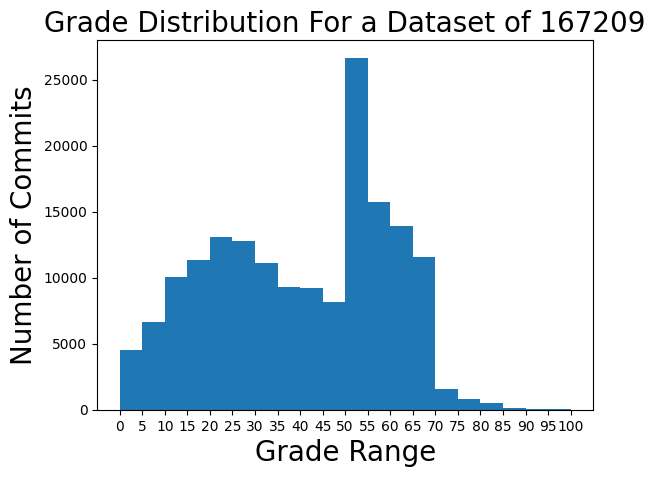

In [ ]:
#create a chart of the grades
graph = plt.hist(dataSet1['grade'], bins=20, range=(0, 100))
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.title("Grade Distribution For a Dataset of " + str(len(dataSet1)), fontsize=20)
plt.xlabel("Grade Range", fontsize=20)
plt.ylabel("Number of Commits", fontsize=20)
plt.show()





In [ ]:
#create a copy of the dataset
dataSet1temp = dataSet1.copy()

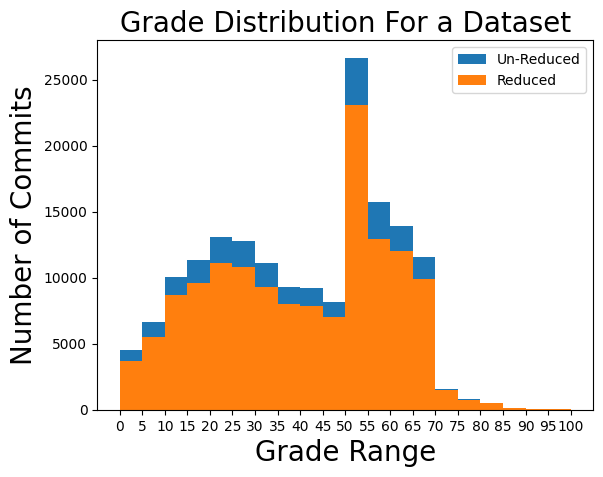

In [ ]:
#create a chart comparing dataset1 with dataSet1temp
plt.hist(dataSet1temp['grade'], bins=20, range=(0, 100))
plt.hist(dataSet1['grade'], bins=20, range=(0, 100))
plt.legend(['Un-Reduced', 'Reduced'])
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.title("Grade Distribution For a Dataset", fontsize=20)
plt.xlabel("Grade Range", fontsize=20)
plt.ylabel("Number of Commits", fontsize=20)
plt.show()



In [ ]:
import sys
import re
import difflib

dataSet1 = dataSet1.reset_index(drop=True)

dataSetSimilarReduction = True
dataSetSimilarReductionSizeDiffrenceSkip = 50 #Skip if the difference in size (in characters) is greater than this number, use since diff is slow
dataSetSimilarReductionRatio = .90 #The ratio of the diff to the last commit message to be considered similar
dataSetSimilarReductionDisableSlow = False #Disable the slow diff check, use if you are okay with false positives for a much faster check.

dumbDataCleaning = not ranSimilarization
dumbDataCleaning = False


#Regex used in the basic data cleaning
regexBlankLineMostly = r"(^\s{1,}$)"
regexBlankLineFinish = r"(^\n{1,})"

def stringProcessing(string, noSimilarization = False):
    if (noSimilarization):
        string = string.replace("\"\"\"" , "\"")
        string = string.replace("\'\'\'" , "\"")
        string = string.replace("\\'" , "")
        string = string.replace('\\"' , "")
        string = re.sub("('|\")[\x1f-\x7e]{1,}?('|\")", " \"sGH\"", string)
        string = re.sub("#.*", "", string)
    string = string.replace('    ', '\t')
    string = re.sub(regexBlankLineMostly, '', string, 0, re.MULTILINE)
    string = re.sub(regexBlankLineFinish, '', string, 0, re.MULTILINE)
    return string

#Similar data reduction
if (dataSetSimilarReduction == True):
    #BasicCleanedValuesRepo = []
    print("Removing similar data, dataset size = " + str(len(dataSet1)))
    for i in range(len(dataSet1)):
        if (i < len(dataSet1)):
            if (i != 0 and i != len(dataSet1)-1):
                printProgressBar(i, len(dataSet1), prefix = 'Progress:', suffix = 'Complete', length = 200)
                if abs(dataSet1['grade'][i] - dataSet1['grade'][i-1]) < 3 and abs(len(dataSet1['data'][i]) - len(dataSet1['data'][i-1])) < dataSetSimilarReductionSizeDiffrenceSkip:
                    #Use difflib to compare the data
                    diff = difflib.SequenceMatcher(None, dataSet1['data'][i], dataSet1['data'][i-1])
                    #see how many lines are different
                    #print ratio using progress bar
                    if (diff.quick_ratio() > dataSetSimilarReductionRatio):
                        if (diff.ratio() > dataSetSimilarReductionRatio or dataSetSimilarReductionDisableSlow):
                            clear_output(wait=True)
                            print ("Removing data at index " + str(i))
                            print ('\n')
                            #BasicCleanedValuesRepo.append(dataSet1['repo'][i])
                            dataSet1 = dataSet1.drop([i])
                            dataSet1 = dataSet1.reset_index(drop=True)
                            i = i - 2
                    del(diff)
                
                
    #reset the keys of the dataframe
    
    print("Removed similar data, dataset size = " + str(len(dataSet1)))


#Basic data cleaning, dumb version for if we couldn't do code similarization
print("Memory used by dataSet1: " + str(sys.getsizeof(dataSet1)))
memUsage = sys.getsizeof(dataSet1)
for j in range(len(dataSet1)):
    printProgressBar(j, len(dataSet1), prefix = 'Progress:', suffix = 'Complete', length = 50)
    #use regex to replace all new lines only with tabs to newlines without tabs eventually
    dataSet1.loc[j, 'data'] = stringProcessing(dataSet1['data'][j], dumbDataCleaning)
print("Memory used by dataSet1: " + str(sys.getsizeof(dataSet1)))
print("Memory Delta: " + str(sys.getsizeof(dataSet1) - memUsage))



print(dataSet1)


Removing data at index 142400


Removed similar data, dataset size = 142402
Memory used by dataSet1: 736392601
Memory used by dataSet1: 653905881██████████████████████████-| 100.0% Complete
Memory Delta: -82486720
                                                     data      grade  \
0       import requests\nimport yaml\nfrom glob import...  22.000000   
1       import json\nimport logging\nimport os.path\ni...  22.000000   
2       import os\nimport sys\nimport yaml\nfrom foia_...  22.000000   
3       import os\nimport sys\nimport yaml\nfrom foia_...  32.000000   
4       import sys\nimport os\nimport glob\nimport uti...  22.000000   
...                                                   ...        ...   
142397  import pyfrc.config\nimport pytest\nfrom netwo...  22.714286   
142398  from networktables.util import ChooserControl\...  34.142857   
142399  import os\nfrom os.path import dirname, exists...  18.428571   
142400  import os\nfrom os.path import dirname, exists...  31.2857

In [ ]:


padNow = True

to_pad = ['\n', '\t', '\r', '(', ')', '[', ']', '{', '}', '<', '>', '!', '?', ',', '.', ':', ';', '`', '~', '@', '#', '$', '%', '^', '&', '*', '=', '+', '/', '\\', '|']

def stringPadding(dataSet):
    #tokenize dataSet
    #dataSet = padSymbols(dataSet)
    
    #get rid of excess \n
    #pad to_pad segments with spaces in dataSet
    if (type(dataSet) == str):
        for i in range(len(to_pad)):
            dataSet = dataSet.replace(to_pad[i], ' ' + to_pad[i] + ' ')
        return dataSet

if (padNow == True):
    for i in to_pad: 
        printProgressBar(to_pad.index(i), len(to_pad) - 1, prefix = 'Progress Padding Symbols:', suffix = 'Complete', length = 50)
        for j in range(len(dataSet1)):
            dataSet1['data'][j] = dataSet1['data'][j].replace(i, ' '+i+' ') 


Progress Padding Symbols: |██████████████████████████████████████████████████| 100.0% Complete


In [ ]:
#save the padded and processed data for testing purposes
dataSet1.to_csv(pathToDataCollectorDatabase + slashForDir + 'dataSet1Padded.csv', index=True)

In [ ]:
#load the padded and processed data for testing purposes

dataSet1 = pd.read_csv(pathToDataCollectorDatabase + slashForDir + 'dataSet1Padded.csv')


In [ ]:
#print how many diffrent repos are represented in dataSet1 using the repo column
print(dataSet1['repo'].unique())

['2015-foia\\' '2018.1-tropicalhazards-bi\\' '2018.2-lino\\' ...
 'robotframework-whitelibrary\\' 'roboticslanguage\\'
 'robotpy-wpilib-utilities\\']


In [ ]:
print(dataSet1)

#print the size of the data set in ram in gb
memUsage = sys.getsizeof(dataSet1)
print("Memory used by dataSet1: " + str(memUsage / 1000000000) + " gb")
#tokenize the data

                                                     data      grade  \
0       import requests \n import yaml \n from glob im...  22.000000   
1       import json \n import logging \n import os . p...  22.000000   
2       import os \n import sys \n import yaml \n from...  22.000000   
3       import os \n import sys \n import yaml \n from...  32.000000   
4       import sys \n import os \n import glob \n impo...  22.000000   
...                                                   ...        ...   
142397  import pyfrc . config \n import pytest \n from...  22.714286   
142398  from networktables . util import ChooserContro...  34.142857   
142399  import os \n from os . path import dirname ,  ...  18.428571   
142400  import os \n from os . path import dirname ,  ...  31.285714   
142401  import os \n from os . path import dirname ,  ...  32.714286   

                             repo  
0                      2015-foia\  
1                      2015-foia\  
2                      2015

In [ ]:
#delete the data column

dataSet1 = dataSet1.drop(['data'], axis=1)

In [ ]:
MemsizeMaxGB = 30
maxWords = 1500
maxLen = 9000
tokenizer = Tokenizer(filters='' , split=' ', lower=True, num_words=maxWords)

MemsizeMax = MemsizeMaxGB * 1024 * 1024 * 1024
tokenizer.fit_on_texts(dataSet1[dataSet1.columns[0]]) 
X = tokenizer.texts_to_sequences(dataSet1[dataSet1.columns[0]])
#Check the length of the longest sequence
dataLength = []
#delete the data to save memory


for i in range(len(X)):
    dataLength.append(len(X[i]))

print("Longest Sequence: ", max(dataLength))
#get statistics on the length of the sequences
print("Mean Sequence Length: ", np.mean(dataLength))
print("Median Sequence Length: ", np.median(dataLength))
print("Standard Deviation of Sequence Length: ", np.std(dataLength))

tempMaxLength = np.median(dataLength) + 2 * np.std(dataLength)
tempMaxLength = np.mean(dataLength) + .5 * np.mean(dataLength)
print ("Temp Max Length: ", tempMaxLength)


#check max mem usage for an int32 array
if (tempMaxLength * 4 * len(dataSet1) > MemsizeMax):
    print("Max Length too large for memory, reducing to ", int(MemsizeMax / 4 / len(dataSet1)))
    tempMaxLength = int(MemsizeMax / 4 / len(dataSet1))
    
print("Mem Usage" + str(tempMaxLength * 4 * len(dataSet1) / 1024 / 1024 / 1024))

"""
if tempMaxLength < maxLen:
    tempMaxLength = maxLen
    print("Max Length: ", tempMaxLength)
"""
maxLen = int(tempMaxLength)

Longest Sequence:  4292139
Mean Sequence Length:  1379.7785073243354
Median Sequence Length:  536.0
Standard Deviation of Sequence Length:  15747.724177614458
Temp Max Length:  2069.667760986503
Mem Usage1.0979278342136702


In [ ]:
print("Max Length: ", maxLen)
print("Memory Usage: ", maxLen * 4 * len(dataSet1) / 1024 / 1024 / 1024)

Max Length:  2069
Memory Usage:  1.097573596984148


In [ ]:
X = pad_sequences(X, maxlen=maxLen)

In [ ]:
#Save X for debugging purposes
np.save(pathToDataCollectorDatabase + slashForDir + 'X.npy', X)

#save tokenizer for later use
import pickle
with open(pathToDataCollectorDatabase + slashForDir + 'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#save maxWords and maxLen for later use
with open(pathToDataCollectorDatabase + slashForDir + 'maxWords.pickle', 'wb') as handle:
    pickle.dump(maxWords, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(pathToDataCollectorDatabase + slashForDir + 'maxLen.pickle', 'wb') as handle:
    pickle.dump(maxLen, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#save the grade column for later use
dataSet1.to_csv(pathToDataCollectorDatabase + slashForDir + 'dataSet1Grades.csv', index=True)

Tokenizer Stats: 
Top 1000 words: 
(


In [ ]:
#load X for debugging purposes
X = np.load(pathToDataCollectorDatabase + slashForDir + 'X.npy')

#load tokenizer for debugging purposes
with open(pathToDataCollectorDatabase + slashForDir + 'tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
    
#load maxWords and maxLen for debugging purposes
with open(pathToDataCollectorDatabase + slashForDir + 'maxWords.pickle', 'rb') as handle:
    maxWords = pickle.load(handle)

with open(pathToDataCollectorDatabase + slashForDir + 'maxLen.pickle', 'rb') as handle:
    maxLen = pickle.load(handle)
    
#load the grade column for debugging purposes
dataSet1 = pd.read_csv(pathToDataCollectorDatabase + slashForDir + 'dataSet1Grades.csv')

#print x length and grade length
print("X Length: ", len(X))
print("Grade Length: ", len(dataSet1['grade']))
#print the first 10 elements of X
print(X[0:10])
#print the last 10 elements of X
print(X[-10:])


X Length:  68940
Grade Length:  68939
[[ 0  0  0 ... 27  8  9]
 [ 0  0  0 ...  7 27  9]
 [ 0  0  0 ...  7 27  9]
 ...
 [ 0  0  0 ...  2  3  9]
 [ 0  0  0 ...  7 49  9]
 [ 0  0  0 ...  7 49  9]]
[[ 0  0  0 ... 14 10  9]
 [ 0  0  0 ... 14 10  9]
 [ 0  0  0 ... 14 10  9]
 ...
 [ 0  0  0 ...  4 16  9]
 [ 0  0  0 ... 25 10  9]
 [ 0  0  0 ... 29  3  9]]


In [ ]:
#drop the last element of x
#print x length and grade length
print("X Length: ", len(X))
print("Grade Length: ", len(dataSet1['grade']))

X Length:  68939
Grade Length:  68939


Mean Word Count:  256.02006086754767
Median Word Count:  2.0


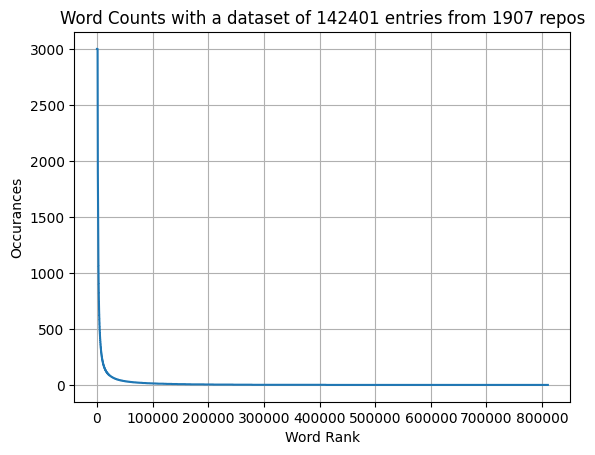

810284
9000


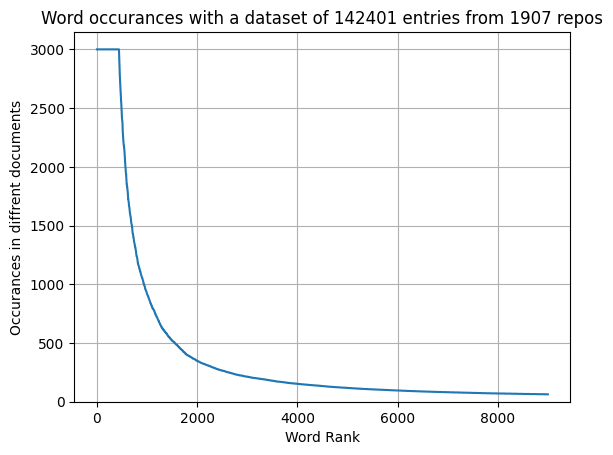

In [ ]:
#Data Analysis for finding the best word count.

#print(tokenizer.word_counts)

#print a graph of the word counts
wordCounts = tokenizer.word_counts
wordCounts = sorted(wordCounts.items(), key=lambda x: x[1], reverse=True)
wordCounts = dict(wordCounts)
wordCounts = list(wordCounts.values())
#get mean word count



meanWordCount = np.mean(wordCounts)

#get the median word count
medianWordCount = np.median(wordCounts)

print("Mean Word Count: ", meanWordCount)
print("Median Word Count: ", medianWordCount)
wordCounts = wordCounts
wordCounts = np.clip(wordCounts, 0, 3000)

#graph the word counts with a grid
plt.plot(wordCounts)
plt.ylabel('Occurances')
plt.xlabel('Word Rank')
plt.title('Word Counts with a dataset of ' + str(len(dataSet1)) + ' entries from ' + str(len(df)) + ' repos')
plt.grid(True)
plt.show()

#graph the amound of words that appear in each file
fileWordCounts = tokenizer.word_docs
#translate the words to their tokens
fileWordCounts = sorted(fileWordCounts.items(), key=lambda x: x[1], reverse=True)
fileWordCounts = dict(fileWordCounts)
#create a list of dict keys
fileWordCountsKey = list(fileWordCounts.keys())
print (len(fileWordCountsKey))
wordIndex = tokenizer.word_index
fileWordCountTokenConversion = []
for i in fileWordCounts:
    tken = wordIndex[i]
    fileWordCountTokenConversion.append(tken)
 

#create a list of FileWordCountTokenConversion and fileWordCounts values combined
fileWordCounts = list(fileWordCounts.values())
fileWordCounts = np.clip(fileWordCounts, 0, 300000000000000000000000000)
fileWordCounts = list(zip(fileWordCountTokenConversion, fileWordCounts))
fileWordCounts = sorted(fileWordCounts, key=lambda x: x[1], reverse=True)
fileWordCounts = dict(fileWordCounts)
fileWordCounts = list(fileWordCounts.values())
#get rid of the bottom results
fileWordCounts = fileWordCounts[0:9000]
#graph the word counts with a grid
plt.plot(np.clip(fileWordCounts,0,3000))
plt.ylabel('Occurances in diffrent documents')
plt.xlabel('Word Rank')
plt.title('Word occurances with a dataset of ' + str(len(dataSet1)) + ' entries from ' + str(len(df)) + ' repos')
plt.grid(True)
#make 0 show on y axis
plt.ylim(ymin=0)
print (len(fileWordCounts))

In [ ]:
print(X.shape)
print("test")
len(dataSet1['data'])

(142402, 2069)
test


142402

In [ ]:
from tokenize import TokenInfo
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import Bidirectional
from keras.layers import ConvLSTM2D
from keras.layers import TimeDistributed
from keras.layers import Conv2D

model = Sequential()

#delete the data row of dataSet1

#get the number of unique words in the dataset
model.add(Embedding(maxWords+1, 128, input_length=X.shape[1]))
#model.add(Conv1D(512, 20, activation='relu'))
#model.add(Conv1D(256, 20, activation='relu'))
#model.add(Bidirectional(LSTM(512, return_sequences=True))) 
#model.add(Bidirectional(LSTM(256)))
model.add(Bidirectional(LSTM(512, return_sequences=True))) 
model.add(Bidirectional(LSTM(256)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))

print(model.summary())
model.compile( loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'accuracy'])
hist = model.fit(X, np.array(dataSet1['grade'].to_list()),validation_split=0.2, epochs=1, verbose=1)
# evaluate the model
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()

#save the model
#model.save('model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2069, 128)         192128    
                                                                 
 bidirectional (Bidirectiona  (None, 2069, 512)        788480    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [ ]:
#save the tokenizer
path = convSlashes('D:\\models\\python')
modelName = 'python_model_2_Similar'
import pickle

#make the directory if it does not exist
if not os.path.exists(path):
    os.makedirs(path)

#make the modelName directory if it does not exist
if not os.path.exists(path+modelName):
    os.makedirs(path+modelName)

with open(path + modelName + slashForDir + 'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

#save the model
model.save(path + modelName + slashForDir + 'model.h5')

#save info about the model
import json
modelInfo = {'maxWords': maxWords, 'maxLen': maxLen}
with open(path + modelName + slashForDir + 'modelInfo.json', 'w') as outfile:
    json.dump(modelInfo, outfile)
    outfile.close()
    
#save Model Stats (hist.history)
with open(path + modelName + slashForDir + 'modelStats.json', 'w') as outfile:
    json.dump(hist.history, outfile)
    outfile.close()
    




In [ ]:
#print a random peice of data from the data set
import random
print(X[random.randint(0, len(X))])
#print the text of the random peice of data
X_list = random.choice(X).tolist()
print(tokenizer.sequences_to_texts([X_list]))




[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
#load the model
path= convSlashes('/home/mcall/models')
modelName = 'python_model_1_RNN'
from keras.models import load_model
model = load_model(path + modelName + slashForDir + 'model.h5')

#load the tokenizer
import pickle
with open(path + modelName + slashForDir + 'tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

#load the model info
import json
with open(path + modelName + slashForDir + 'modelInfo.json') as json_file:
    modelInfo = json.load(json_file)


In [ ]:
"""For comparison, 1000 randomly generated numbers from 1-100 generated and have statistic analysis performed on them"""
randomgrades = []
randomgrades2 = []
import random
import statistics

from sklearn.metrics import mean_absolute_percentage_error
for i in range(1000):
    randomgrades.append(random.randint(1,100))
    randomgrades2.append(random.randint(1,100))

print("Random Grades")
#mean squared error
print("Mean Squared Error: ", mean_squared_error(randomgrades, randomgrades2))
#mean absolute error'
print("Mean Absolute Error: ", mean_absolute_error(randomgrades, randomgrades2))
#mean absolute percentage error
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(randomgrades, randomgrades2))

In [ ]:
grade = []

In [ ]:
#print the tokenizer word index
print(tokenizer.word_index)

In [ ]:
#open a file and store the data in a variable
#data = open("", 'r', encoding="utf8")
#dataread = data.read()
#close the file
#data.close()

dataread = """
print("Hello World")


"""

dataread = stringProcessing(dataread)

dataread = stringPadding(dataread)

#tokenize the data
tokens = tokenizer.texts_to_sequences([dataread])
#pad the data
tokens = pad_sequences(tokens, maxlen=X.shape[1])
#predict the grade
grade.append(model.predict(tokens).tolist()[0][0])
print(grade)

In [ ]:
print("test")

In [ ]:
#Load a 2nd model
path= convSlashes('D:\\Models\\python\\')
modelName = 'python_model_1'

from keras.models import load_model
model2 = load_model(path + modelName + slashForDir + 'model.h5')

#load the tokenizer
import pickle
with open(path + modelName + slashForDir + 'tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)

#load the model info
import json
with open(path + modelName + slashForDir + 'modelInfo.json') as json_file:
    modelInfo2 = json.load(json_file)

In [ ]:



#open a file and store the data in a variable
data = open("C:\\Users\\Mcall\Desktop\\IT100L-Programming-Logic-and-Design-Laboratory-Course-main\\Activity4\\Activty2.py", 'r', encoding="utf8")
datareaded = data.read()
#close the file
data.close()

dataread = stringProcessing(datareaded)



#tokenize the data
tokens = tokenizer2.texts_to_sequences([datareaded])
#pad the data
tokens = pad_sequences(tokens, maxlen=X.shape[1])
#predict the grade
grade.append(model2.predict(tokens).tolist()[0][0])
print(grade)